# **Logistic Regression**

The Logistic (Sigmoid) Function takes in any value and outputs it to always be between 0 and 1.

# **PART 1**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train=pd.read_csv("titanic_train.csv")

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


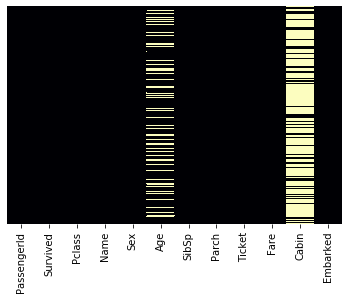

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="magma")
#Every cream-colored point indicates that it is a true value. 
#True in the sense null, as this is a heatmap of train.isnull()

# **PART 2**

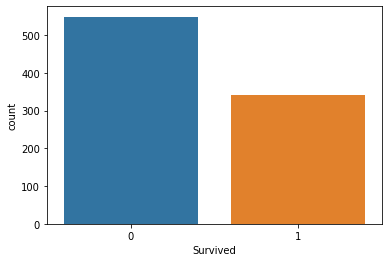

In [10]:
sns.countplot(x="Survived", data=train)
#0 represents false, i.e., not survived
#1 represents true, i.e., survived

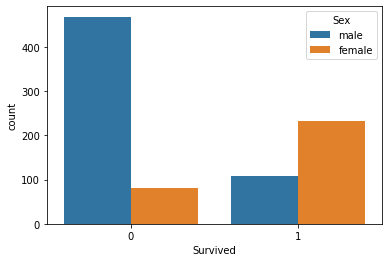

In [11]:
sns.countplot(x="Survived", hue="Sex", data=train)

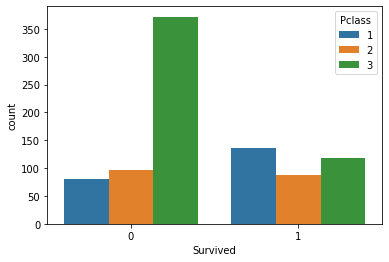

In [12]:
sns.countplot(x="Survived", hue="Pclass", data=train)

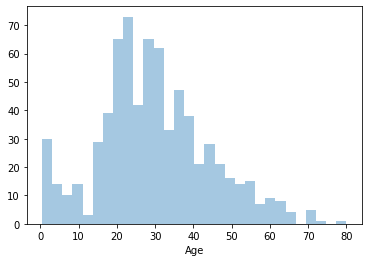

In [13]:
sns.distplot(train["Age"].dropna(), kde=False, bins=30)
#dropna() is because there are a lot of missing age values in the data
#we don't want to plot all those missing values

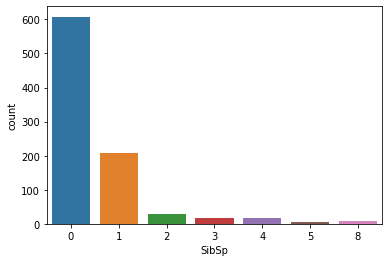

In [14]:
sns.countplot(x="SibSp", data=train)

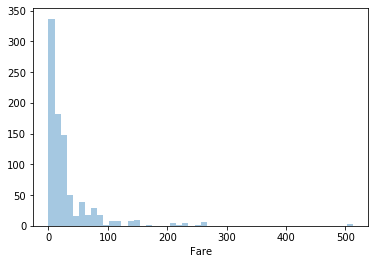

In [15]:
sns.distplot(train["Fare"], kde=False)

Since there are a lot of missing age values, we might find a need to fill the missing values with some value. One way of doing that is by filling in the mean age of all the passengers. This is known as imputation.

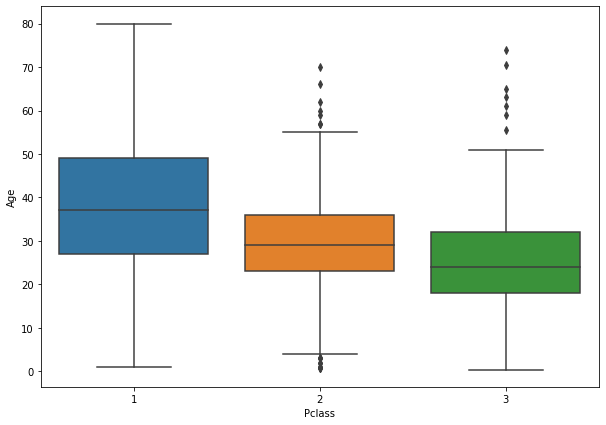

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=train)

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train["Age"]=train[["Age", "Pclass"]].apply(impute_age, axis=1)
#axis=1 indicates that we are applying the function to the columns

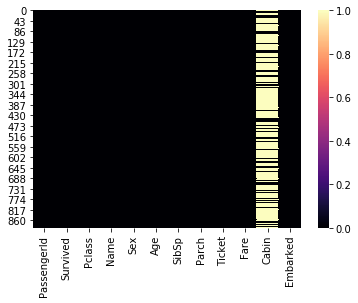

In [21]:
sns.heatmap(train.isnull(), cmap="magma")
#now there are no missing age values

In [22]:
train.drop("Cabin", inplace=True, axis=1)

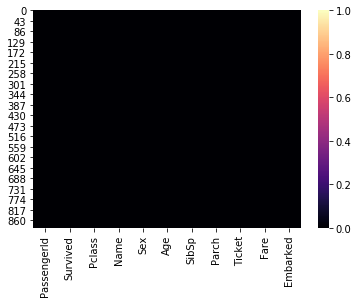

In [23]:
sns.heatmap(train.isnull(), cmap="magma")

This is the first step - cleaning data, i.e., dealing with missing values. We have cleared all the missing values in the age column and we have removed the cabin column (there are way too many missing values present in it).

The next step is to deal with categorical values. We will need to convert these categorical values into dummy values (aka indicator variables) that only show 0 or 1 meaning, false or true (with pandas). If we don't convert it into dummies, the machine learning algorithm won't be able to perceive it.

In [25]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
sex=pd.get_dummies(train["Sex"], drop_first=True)
#this drops the first column so that the machine learning algorithm will not get confused
#and confuse us in return
#here, there is only 'male' column. so, 1 indicates true, i.e., male
#and 0 indicates false, i.e., female

In [30]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [31]:
embark=pd.get_dummies(train["Embarked"], drop_first=True)

In [32]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
train=pd.concat([train, sex, embark], axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


We have encoded the Embarked column into Q and S, also the Sex column into single digit valued columns. So, we don't really need the original columns (Embarked and Sex). The other columns that we don't have to use or cannot use are Ticket and Name. The values are not really useful as they don't make much of a difference.

In [35]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], inplace=True, axis=1)

In [36]:
train.head()
#all the data is numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [40]:
#since PassengerId is essentially the index, we don't need it.
train.drop("PassengerId", axis=1, inplace=True)

In [41]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# **PART 3**

In [42]:
X=train.drop("Survived", axis=1) 
y=train["Survived"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=101, test_size=0.3)

In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel=LogisticRegression()

In [49]:
logmodel.fit(X_train, y_train)

C:\Users\srinija\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions=logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
print(confusion_matrix(y_test, predictions))

[[133  21]
 [ 38  76]]
